In [171]:
%matplotlib inline
import pandas as pd
import evaluation_helper as eval
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx_viewer import Viewer


count = 224 - 51
                     
# Read in data
files = []
predictions = []
for i in range(51, 224):
    file = pd.read_csv('./maps/nn_output/probabilities' + str(i) + '.csv', sep=';')
    predictions.append(file['prediction'].values[51:])
    
len(predictions[0])   
    

    

174

In [175]:
averages = []
ids_europe = ["51", "64", "66", "70", "74", "78", "79", "81",
       "88", "93", "94", "108", "113", "114", "115", "142",
       "143", "144", "146", "147", "154", "159", "164", "165",
       "176", "178", "179", "181", "182", "184", "190", "191",
       "194", "196", "203", "205", "206", "216"]

ids_africa = ["56", "57", "67", "71", "75", "76", "77", "82",
       "84", "85", "87", "89", "96", "97", "98", "102",
       "103", "120", "122", "125", "129", "131", "138", "140",
       "141", "145", "149", "150", "151", "152", "156", "158",
       "161", "162", "175", "180", "183", "187", "189", "192",
       "197", "198", "200", "208", "211", "212", "215", "222",
       "223"]

for i in range (count):
    suma = 0
    for j in range(count):
        suma += predictions[i][j]
    averages.append(suma/count)

relationships = []
for i in range (count):
    if str(i+51) in ids_africa:
        relationship = []
        for j in range(count):
            if str(j+51)in ids_africa:
                relationship.append(predictions[i][j]/averages[i])
        relationships.append(relationship)

print(len(relationships))
print(len(relationships[0]))

49
49


In [176]:
labels = pd.read_csv('./data/place_code_relat.csv', sep=',')

# labels = labels['name']
# labels = labels['name'][48:222]
# labels


# labels = pd.read_csv('./data/place_code_relat.csv', sep=',')

# labels = labels['name']
ids =[int(i) for i in ids_africa]
europe_labels = []

labels= labels.loc[labels['id'].isin(ids)]
labels= labels['name']
labels

53                  Algeria
54                   Angola
64                    Benin
68                 Botswana
72             Burkina Faso
73                  Burundi
74                     Chad
79          Dem. Rep. Congo
81                 Djibouti
82                    Egypt
84                  Eritrea
86                 Ethiopia
93                    Gabon
94                   Gambia
95                    Ghana
99                   Guinea
100           Guinea-Bissau
117            South Africa
119                S. Sudan
122                Cameroon
126                   Kenya
128                   Congo
135                 Lesotho
137                 Liberia
138                   Libya
142              Madagascar
146                  Malawi
147                    Mali
148                 Morocco
149              Mauritania
153              Mozambique
155                 Namibia
158                   Niger
159                 Nigeria
172           Côte d'Ivoire
177              Eq.

In [177]:
test =[label[1] for label in labels.items()]
test
df = pd.DataFrame(relationships, columns=[label[1] for label in labels.items()])

In [178]:
corr = df.corr()
# corr

In [179]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']



In [188]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)

links_filtered=links.loc[ (links['value'] > 0.6) & (links['var1'] != links['var2']) ]
links_filtered=links_filtered[links_filtered.var1.isnull() == False]
links_filtered=links_filtered[links_filtered.var2.isnull() == False]

links_filtered = links_filtered.sort_values(by=['value'],ascending=False)
links_filtered = links_filtered.groupby('var1').head(3)



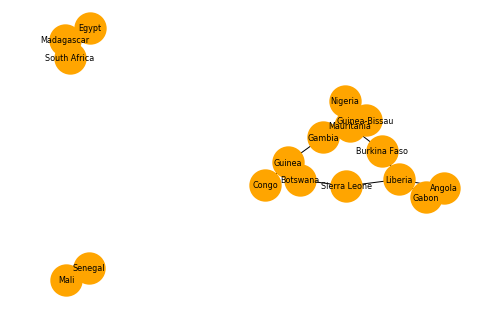

In [189]:
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=500, edge_color='black', linewidths=10, font_size=8,pos=nx.spring_layout(G))
